# EDA for Prices Dataset

Initial look at data and data cleaning


## Import necassary libraries

In [55]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

In [56]:
#Load dataset
df_prices = pd.read_csv('../data/prices_20210713.csv')

In [57]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN


## Correcting date and time formatting.

In [58]:
df_prices['date_from'] = pd.to_datetime(df_prices['date_from'], errors = 'coerce')
df_prices['date_to'] = pd.to_datetime(df_prices['date_to'], errors = 'coerce')


In [59]:
df_prices.query('price_per_day_from <= 3') 

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from
22175,f3b75783-7156-5644-b032-b4cbb2cc239c,6.0,2019-09-15,2019-10-20,1.0,NaN
22176,f3b75783-7156-5644-b032-b4cbb2cc239c,3.0,2019-10-20,2019-12-21,1.0,NaN
22177,f3b75783-7156-5644-b032-b4cbb2cc239c,7.0,2019-12-21,2020-01-07,1.0,NaN
22178,f3b75783-7156-5644-b032-b4cbb2cc239c,3.0,2020-01-07,2020-04-30,1.0,NaN
22179,f3b75783-7156-5644-b032-b4cbb2cc239c,6.0,2019-05-01,2019-06-29,1.0,NaN
...,...,...,...,...,...,...
414132,c0794503-406d-5e62-8d8d-f8bf55feeb91,NaN,2020-12-20,2020-12-21,2.0,NaN
414133,c0794503-406d-5e62-8d8d-f8bf55feeb91,3.0,2020-12-24,2020-12-25,2.0,NaN
414134,c0794503-406d-5e62-8d8d-f8bf55feeb91,NaN,2020-12-27,2020-12-28,2.0,NaN
414135,c0794503-406d-5e62-8d8d-f8bf55feeb91,3.0,2020-12-31,2021-01-01,2.0,NaN


In [60]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN


In [61]:
df_prices.describe().round()

,min_days,price_per_day_from,price_per_week_from
count,496174.0,474779.0,237725.0
mean,4.0,104.0,731.0
std,2.0,267.0,32858.0
min,1.0,0.0,0.0
25%,3.0,64.0,420.0
50%,4.0,85.0,550.0
75%,6.0,120.0,763.0
max,28.0,153153.0,16016033.0


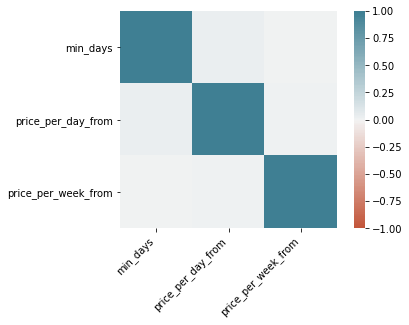

In [62]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

## Translating "price per day" to "price per week", and visa versa.

In [63]:
df_prices['filled_in_price_per_day']= df_prices.price_per_day_from.fillna(
    (df_prices.price_per_week_from)/7) 
df_prices['filled_in_price_per_week'] = df_prices.price_per_week_from.fillna(
    (df_prices.price_per_day_from)*7) 
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN,70.0,490.0
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN,78.0,546.0
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN,70.0,490.0
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN,58.0,406.0
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN,80.0,560.0


## Checking work

In [64]:

df_prices['price_per_week_from'].isna().value_counts()

True     259250
False    237725
Name: price_per_week_from, dtype: int64

In [65]:
df_prices['filled_in_price_per_week'].isna().value_counts()

False    493869
True       3106
Name: filled_in_price_per_week, dtype: int64

Not Nan should be reduced but still exist when there was not price set in either column.

## Validating whether 999 and 9999 are real values

In [66]:
df_prices['filled_in_price_per_day'].isna().value_counts()

False    493869
True       3106
Name: filled_in_price_per_day, dtype: int64

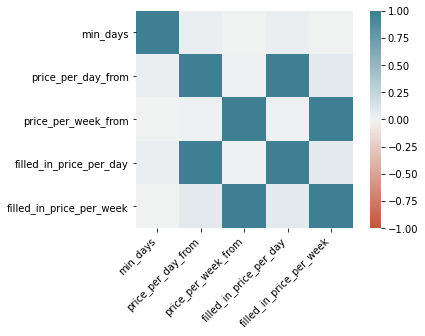

In [67]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [68]:
df_prices.query('filled_in_price_per_day == 9999 or filled_in_price_per_day == 999') 

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
275974,df8b1896-6cb8-510f-a360-cd5610b38241,4.0,2019-06-19,2019-06-20,999.0,NaN,999.0,6993.0
302161,49575866-6cc8-5d5a-ae11-6bfe263702ee,1.0,2021-12-23,2022-01-09,999.0,NaN,999.0,6993.0
302166,49575866-6cc8-5d5a-ae11-6bfe263702ee,1.0,2022-12-23,2023-01-08,999.0,NaN,999.0,6993.0
386523,a77b1c66-929d-5bb6-9d9e-36f20279bb98,4.0,2019-12-20,2020-01-13,999.0,6993.0,999.0,6993.0
386524,a77b1c66-929d-5bb6-9d9e-36f20279bb98,3.0,2020-01-13,2020-02-07,999.0,6007.0,999.0,6007.0
386525,a77b1c66-929d-5bb6-9d9e-36f20279bb98,3.0,2020-02-07,2020-03-02,999.0,6993.0,999.0,6993.0
386526,a77b1c66-929d-5bb6-9d9e-36f20279bb98,3.0,2020-03-02,2020-04-03,999.0,6007.0,999.0,6007.0
386527,a77b1c66-929d-5bb6-9d9e-36f20279bb98,3.0,2020-04-03,2020-05-01,999.0,6993.0,999.0,6993.0
386535,a77b1c66-929d-5bb6-9d9e-36f20279bb98,3.0,2020-12-18,2021-01-11,999.0,6993.0,999.0,6993.0
424426,4a6df2e7-d651-56ef-b7c2-c9761148bb65,7.0,2019-12-30,2020-01-05,999.0,NaN,999.0,6993.0


In [69]:
df_prices.query('filled_in_price_per_day == 9999 or filled_in_price_per_day == 999').count()

listing_id                  11
min_days                    11
date_from                   11
date_to                     11
price_per_day_from          11
price_per_week_from          7
filled_in_price_per_day     11
filled_in_price_per_week    11
dtype: int64

In [70]:
smf.ols(formula='price_per_week_from ~ price_per_day_from', data=df_prices).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     price_per_week_from   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     20.08
Date:                 Fri, 16 Jul 2021   Prob (F-statistic):           7.42e-06
Time:                         09:42:33   Log-Likelihood:            -2.5932e+06
No. Observations:               218635   AIC:                         5.186e+06
Df Residuals:                   218633   BIC:                         5.186e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            411.6612    101.135      4.070      0.000     213.439     609.884
price_per_day_from     3.2477      0.725      4.481      0.000       1.827       4.668
===============================================================================
Omnibus:                  1345587.292   Durbin-Watson:                    2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   434426087075236.688
Skew:                         467.170   Prob(JB):                          0.00
Kurtosis:                  218376.407   Cond. No.                          193.
===============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As only 21 entries were 999 or 9999 was only in the weeks column, we have determined that 999 and 9999 are common placeholder values in this data set. 

## Checking that there are not an abundance of placeholder values (i.e. 0 or 1).

In [71]:
df_prices.query('filled_in_price_per_day == 1234').count()

listing_id                  0
min_days                    0
date_from                   0
date_to                     0
price_per_day_from          0
price_per_week_from         0
filled_in_price_per_day     0
filled_in_price_per_week    0
dtype: int64

## Replacing all values of 0, 1, 999, and 9999.

In [72]:
df_prices['filled_in_price_per_day']= df_prices.filled_in_price_per_day.replace(
    [0, 1, 999, 9999], [np.NaN, np.NaN, np.NaN, np.NaN])
df_prices['filled_in_price_per_week']= df_prices.filled_in_price_per_week.replace(
    [0, 1, 999, 9999], [np.NaN, np.NaN, np.NaN, np.NaN])

## Searching for nonsense prices

In [73]:
bad_data = df_prices.filled_in_price_per_day >= df_prices.filled_in_price_per_week
bad_data.value_counts()

False    496882
True         93
dtype: int64

In [74]:
df_prices.query('filled_in_price_per_day >= 5000')

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
7243,efd43ca0-d987-580c-b937-ff7e4a7d4b67,5.0,2020-12-21,2020-12-22,10525.0,NaN,10525.000000,73675.0
15082,1ccc300c-b45f-550a-b00a-fd9e88886acd,1.0,2016-11-05,2016-12-24,7169.0,497.0,7169.000000,497.0
62297,65f67593-f7cf-55a6-9876-12d65d44517e,1.0,2020-03-30,2020-04-19,7500.0,NaN,7500.000000,52500.0
68669,e112cdda-9ca5-5238-ba67-1332cbffd871,7.0,2022-04-09,2022-06-11,6300.0,NaN,6300.000000,44100.0
79701,c2a8fe66-5f06-50a0-be1d-7cfa25c99043,7.0,2021-04-01,2021-04-17,9900.0,NaN,9900.000000,69300.0
106548,94809f9c-8299-5b5b-ab9b-d4e9d586ee84,3.0,2018-05-18,2018-05-21,10200.0,714.0,10200.000000,714.0
133823,6228e958-9894-5568-a355-f721dbd63cbd,7.0,2021-03-06,2021-06-11,12500.0,NaN,12500.000000,87500.0
177053,dd75838d-0dc8-51cb-ba3c-79c492786d0f,5.0,2021-01-06,2021-06-01,5000.0,350.0,5000.000000,350.0
179929,72a5c16b-68ef-5c99-81bd-9b954393227b,5.0,2021-12-17,2022-03-11,5800.0,350.0,5800.000000,350.0
197458,5d19287c-3548-5cff-8aeb-9253c10b9a15,4.0,2022-12-21,2023-01-06,9400.0,658.0,9400.000000,658.0


In [75]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN,70.0,490.0
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN,78.0,546.0
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN,70.0,490.0
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN,58.0,406.0
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN,80.0,560.0


## Deleting bad data

In [76]:
# Get names of indexes for which column filled_in_price_per_day has value under 10
indexNames = df_prices[df_prices['filled_in_price_per_day'] <= 10 ].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

In [77]:
# Get names of indexes for which column filled_in_price_per_day has value greater than or equal to filled_in_price_per_week
indexNames2 = df_prices[df_prices['filled_in_price_per_day'] >= df_prices['filled_in_price_per_week']].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames2 , inplace=True)

In [78]:
# Get names of indexes for which column filled_in_price_per_week over 1_000_000
indexNames = df_prices[df_prices['filled_in_price_per_week'] >= 140_000 ].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

In [79]:
df_prices.head()

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,NaN,70.0,490.0
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,NaN,78.0,546.0
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,NaN,70.0,490.0
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,NaN,58.0,406.0
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,NaN,80.0,560.0


## Checking high values

In [80]:
df_prices.query('filled_in_price_per_day >= 5000')

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
7243,efd43ca0-d987-580c-b937-ff7e4a7d4b67,5.0,2020-12-21,2020-12-22,10525.0,NaN,10525.000000,73675.0
62297,65f67593-f7cf-55a6-9876-12d65d44517e,1.0,2020-03-30,2020-04-19,7500.0,NaN,7500.000000,52500.0
68669,e112cdda-9ca5-5238-ba67-1332cbffd871,7.0,2022-04-09,2022-06-11,6300.0,NaN,6300.000000,44100.0
79701,c2a8fe66-5f06-50a0-be1d-7cfa25c99043,7.0,2021-04-01,2021-04-17,9900.0,NaN,9900.000000,69300.0
133823,6228e958-9894-5568-a355-f721dbd63cbd,7.0,2021-03-06,2021-06-11,12500.0,NaN,12500.000000,87500.0
213887,b4a853b0-bcae-557b-a6d4-67056707b405,7.0,2020-08-08,2020-08-29,NaN,59000.0,8428.571429,59000.0
227625,435b69ed-9433-5068-b0b3-45c6d2204485,7.0,2022-04-09,2022-04-23,NaN,71500.0,10214.285714,71500.0
241605,ef16ef29-4323-54a6-827a-bc2c7c105cc3,7.0,2021-03-27,2021-04-10,6000.0,NaN,6000.000000,42000.0
276160,df8b1896-6cb8-510f-a360-cd5610b38241,2.0,2021-06-06,2021-06-07,10889.0,NaN,10889.000000,76223.0
300979,5bef255f-14ee-526e-8dc4-bd2d1b583c8c,3.0,2019-08-30,2019-09-21,6900.0,NaN,6900.000000,48300.0


## Looking at date information

In [81]:
pd.to_datetime(df_prices.date_from)

0        2020-04-01
1        2020-06-15
2        2020-09-13
3        2020-11-01
4        2020-12-24
            ...    
496970   2021-03-29
496971   2021-04-12
496972   2021-06-28
496973   2021-08-30
496974   2021-12-20
Name: date_from, Length: 496797, dtype: datetime64[ns]

In [82]:
"""df_prices['month'] = pd.to_datetime(df_prices['date_from']).dt.to_period('M')
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=df_prices, x="date_from", y="filled_in_price_per_day")"""

'df_prices[\'month\'] = pd.to_datetime(df_prices[\'date_from\']).dt.to_period(\'M\')\nfig, ax = plt.subplots(figsize=(15,5))\nsns.lineplot(data=df_prices, x="date_from", y="filled_in_price_per_day")'

## Checking correlation between weeks and days

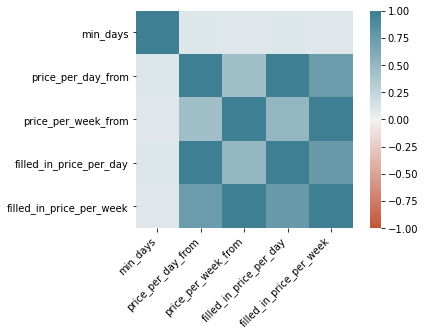

In [83]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [84]:
corr

,min_days,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
min_days,1.000000,0.101666,0.095432,0.103768,0.089881
price_per_day_from,0.101666,1.000000,0.441803,1.000000,0.742382
price_per_week_from,0.095432,0.441803,1.000000,0.509022,1.000000
filled_in_price_per_day,0.103768,1.000000,0.509022,1.000000,0.755844
filled_in_price_per_week,0.089881,0.742382,1.000000,0.755844,1.000000


<AxesSubplot:xlabel='filled_in_price_per_week', ylabel='filled_in_price_per_day'>

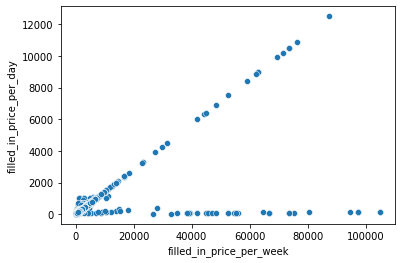

In [85]:
sns.scatterplot(x=df_prices.filled_in_price_per_week, y=df_prices.filled_in_price_per_day)

In [86]:
df_prices.filled_in_price_per_week.max()

105000.0

## Creating price_catagory column

In [87]:
#df_prices['price_catagory']= df_prices.price_per_day_from

In [88]:
def catagorizer(a, b):
    if np.isnan(a):
        if np.isnan(b):
            return "No_info"
        else:
            return "Week"
    else:
        if np.isnan(b):
            return "Day"
    return "Both"


In [89]:

df_prices['price_catagory']= df_prices.apply(lambda x: catagorizer(
    x['price_per_day_from'], x['price_per_week_from']), axis=1)

In [90]:
df_prices['price_catagory'].unique()

array(['Day', 'Both', 'No_info', 'Week'], dtype=object)

In [91]:
df_prices['price_catagory'].value_counts()

Day        256076
Both       218538
Week        19077
No_info      3106
Name: price_catagory, dtype: int64

In [92]:
df_prices[df_prices['price_catagory'] == "No_info"]

,listing_id,min_days,date_from,date_to,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week,price_catagory
238,0d6f6480-0191-5e9f-9f93-b73755bfd136,1.0,2019-01-01,2019-03-16,NaN,NaN,NaN,NaN,No_info
243,0d6f6480-0191-5e9f-9f93-b73755bfd136,1.0,2019-10-26,2019-12-31,NaN,NaN,NaN,NaN,No_info
411,21dfbd24-0801-529f-8661-983f8479cb0c,4.0,2018-11-16,2019-03-16,NaN,NaN,NaN,NaN,No_info
417,21dfbd24-0801-529f-8661-983f8479cb0c,1.0,2019-11-16,2020-03-15,NaN,NaN,NaN,NaN,No_info
475,f41ad7ef-189c-5bb1-8186-ed6b12bdb449,1.0,2018-11-04,2018-12-12,NaN,NaN,NaN,NaN,No_info
...,...,...,...,...,...,...,...,...,...
496828,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2020-12-28,2021-04-19,NaN,NaN,NaN,NaN,No_info
496837,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2021-12-26,2022-01-02,NaN,NaN,NaN,NaN,No_info
496840,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2022-01-02,2022-01-03,NaN,NaN,NaN,NaN,No_info
496844,25daa696-ac23-5278-9c8e-1f2d7173d35c,1.0,2022-03-31,2023-01-01,NaN,NaN,NaN,NaN,No_info


## Deleting price_per_day_from and price_per_week_from

In [93]:
del df_prices['price_per_day_from']

In [94]:
del df_prices['price_per_week_from']

In [95]:
df_prices.head()

,listing_id,min_days,date_from,date_to,filled_in_price_per_day,filled_in_price_per_week,price_catagory
0,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-04-01,2020-06-15,70.0,490.0,Day
1,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-06-15,2020-07-05,78.0,546.0,Day
2,fbd74bce-23dd-53e7-b988-8beb85160d6f,4.0,2020-09-13,2020-11-01,70.0,490.0,Day
3,fbd74bce-23dd-53e7-b988-8beb85160d6f,2.0,2020-11-01,2020-12-24,58.0,406.0,Day
4,fbd74bce-23dd-53e7-b988-8beb85160d6f,5.0,2020-12-24,2021-01-07,80.0,560.0,Day


## Saving to CSV

In [96]:
df_prices.to_csv('../data/prices_dataset.csv')